# Mushroom Classification
This notebook uses a logistic regression classifier to predict whether a given mushroom is posionous or edible. The dataset used in this notebook was found here: https://www.kaggle.com/uciml/mushroom-classification. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import *
from ml.classification.logistic import LogisticRegressionModel

%matplotlib inline

## Load the data

In [2]:
mushrooms = pd.read_csv('./ml/datasets/mushrooms.csv')
print(mushrooms.shape)
print(mushrooms.columns)
mushrooms.head()

(8124, 23)
Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Apply an ordinal based encoding to the data

In [3]:
columns = mushrooms.columns
for column in columns:
    mushrooms[column] = mushrooms[column].astype('category')
    
categorical_columns = mushrooms.select_dtypes(['category']).columns
mushrooms[categorical_columns] = mushrooms[categorical_columns].apply(lambda row: row.cat.codes)
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Split the data into a training and test set

In [4]:
target = 'class'
features = columns.difference({target})
x_train = mushrooms[features][0:7000]
y_train = mushrooms[target][0:7000]
x_test = mushrooms[features][7001:8124]
y_test = mushrooms[target][7001:8124]

## Tune and train the model

In [22]:
model = LogisticRegressionModel()
model.optimization.learning_rate = 0.01
model.optimization.tolerance = 1.0
model.regularization.λ = 0.9
model.learn(x_train, y_train)

## Test the accuracy of the model using the test set

In [23]:
correct_classifications = 0
for x in range(7001, 8124):
    p = model.predict(np.concatenate([[1], x_test.loc[[x]].as_matrix()[0]]))
    if p[1] == y_test.loc[x]:
        correct_classifications += 1
print('Test Accuracy:', correct_classifications, '/', len(x_test), 'Prediction accuracy:', correct_classifications / len(x_test))

Test Accuracy: 1015 / 1123 Prediction accuracy: 0.9038290293855743


## Plot the model cost over time

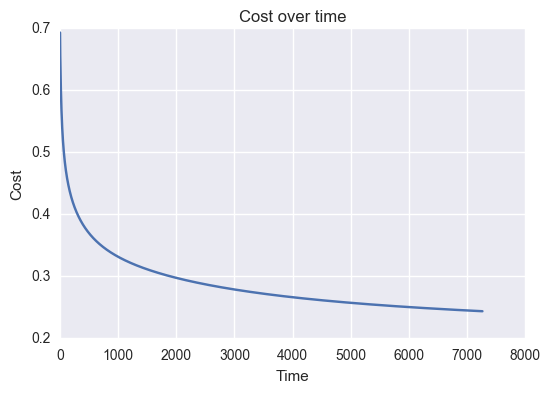

In [24]:
title('Cost over time')
ylabel('Cost')
xlabel('Time')
plot(model.cost_over_time)